In [7]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

rp_9300_LH = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
rp_9300_LH.drop(labels=range(876480,876486),axis = 0, inplace = True)
rp_0112_LH = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/lighthouse/Rockport/Rockport_2003-2012_pwl_harmwl_bwl.csv')
rp_0112_LH.drop(labels=range(876720,876726), axis = 0, inplace=True)
rp_1323_LH = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')
rp_1323_LH.drop(labels=range(len(rp_1323_LH)-6,len(rp_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/NOAA/rockport'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

rp_NOAA = pd.concat(dataframes, ignore_index=True)
rp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
rp_NOAA.reset_index(drop = True, inplace=True)
frames = [rp_9300_LH,rp_0112_LH,rp_1323_LH]
rp_LH = pd.concat(frames, ignore_index=True)
rp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
rp_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = rp_LH['#date+time']
comparison_df['Lighthouse WL'] = rp_LH['015-pwl']
comparison_df['NOAA WL'] = rp_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()

#RP_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\rock-port-2007-output.csv')
RP_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2007-output.csv')
#RP_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\rock-port-2008-output.csv')
RP_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2008-output.csv')
RP_2007.reset_index(drop = True, inplace=True)
RP_2008.reset_index(drop = True, inplace=True)
RP_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2007['Dates'] = pd.to_datetime(RP_2007['Date'])
RP_2007['Water Level'] = pd.to_numeric(RP_2007['Water Level'], errors='coerce')
RP_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2008['Dates'] = pd.to_datetime(RP_2008['Date'])
RP_2008['Water Level'] = pd.to_numeric(RP_2008['Water Level'], errors='coerce')
RP = pd.concat([RP_2007,RP_2008],ignore_index=True)

total_df = RP.merge(comparison_df,on='Dates')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_2962/2584569741.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_9300_LH = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_2962/2584569741.py:16: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_1323_LH = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/data 2/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')


In [8]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,1.964,2006-12-31 21:00:00,1.964,1.964,1.964
1,1.966,2006-12-31 21:06:00,1.966,1.966,1.966
2,1.965,2006-12-31 21:12:00,1.965,1.965,1.965
3,1.969,2006-12-31 21:18:00,1.969,1.969,1.969
4,1.973,2006-12-31 21:24:00,1.973,1.973,1.973
...,...,...,...,...,...
172458,1.907,2008-12-31 23:18:00,1.904,1.907,1.907
172459,1.907,2008-12-31 23:24:00,1.907,1.907,1.907
172460,1.911,2008-12-31 23:30:00,1.907,1.911,1.911
172461,1.916,2008-12-31 23:36:00,1.911,1.916,1.916


Text(0.5, 1.0, 'NOAA interpolation into a time shift')

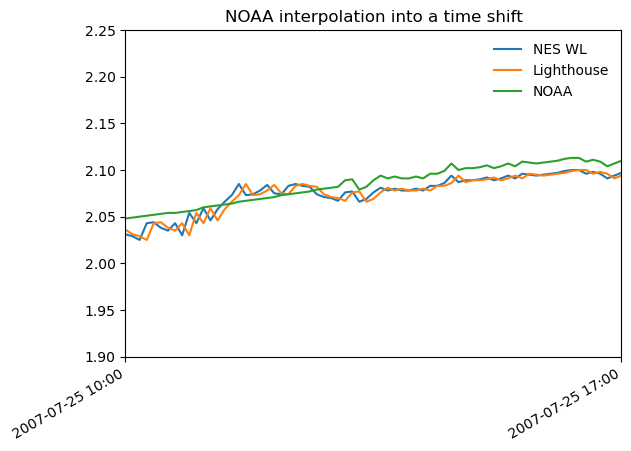

In [11]:
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 10:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('NOAA interpolation into a time shift')